### Importing Necessary Libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

import pickle as pk

import warnings
warnings.filterwarnings("ignore")

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,ElasticNet

### Data Preprocessing

In [2]:
data = pd.read_csv('raw_data.csv') 

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
data.drop(columns='Serial No.', axis=1, inplace=True)

In [54]:
data.rename(columns = {'Chance of Admit ':'Chance of Admit','LOR ':'LOR'},inplace=True)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns='Chance of Admit',axis=1),
                                                data['Chance of Admit'],
                                                test_size = 0.2,
                                                shuffle = True,
                                                random_state = 2)

In [56]:
print(f'Shape of X_train : {X_train.shape}\nShape of X_test : {X_test.shape}\nShape of y_train: {y_train.shape}\nShape of y_test : {y_test.shape}')

Shape of X_train : (400, 7)
Shape of X_test : (100, 7)
Shape of y_train: (400,)
Shape of y_test : (100,)


### Data Analysis

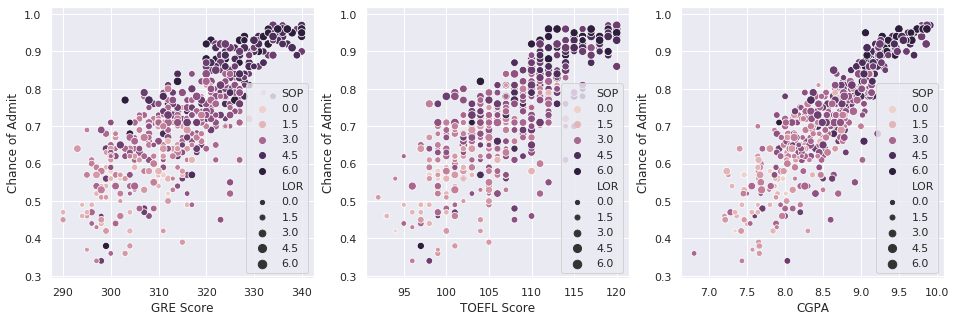

In [73]:
plt.figure(figsize=(16,5))
# for plot in range(1,7)
plt.subplot(131)
sns.scatterplot(x='GRE Score',y='Chance of Admit',data=data,hue='SOP',size='LOR')
plt.subplot(132)
sns.scatterplot(x='TOEFL Score',y='Chance of Admit',data=data,hue='SOP',size='LOR')
plt.subplot(133)
sns.scatterplot(x='CGPA',y='Chance of Admit',data=data,hue='SOP',size='LOR')


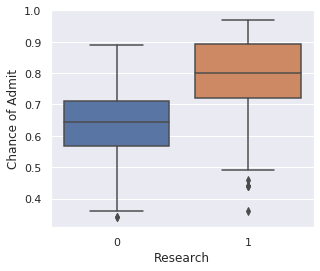

In [71]:
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(x='Research',y='Chance of Admit',data=data)

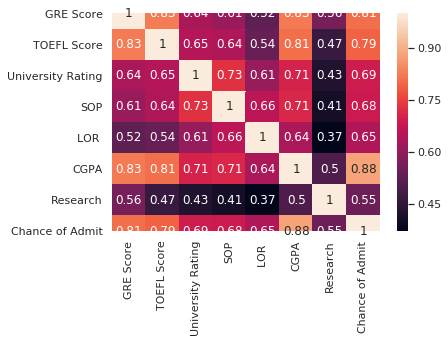

In [35]:
plt.figure(figsize=(6,4))
correlation = data.corr()
sns.heatmap(correlation,annot=True)

### Model Building

In [41]:
scaler = StandardScaler()
linear_regression = LinearRegression()
pipe1 = Pipeline([('scaler',scaler),('linear_regression',linear_regression)])

In [74]:
pipe1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [77]:
print(linear_regression.coef_,linear_regression.intercept_)

[0.02337627 0.0177666  0.00555908 0.00204946 0.01692451 0.06765792
 0.01226737] 0.722125


In [88]:
print(f"R-squared : {pipe1.score(X_train,y_train)}")

R-squared : 0.8293227233691719


In [83]:
y_pred = pipe1.predict(X_test)

In [87]:
print(f"Training MSE : {np.mean((pipe1.predict(X_train)-y_train)**2)}")
print(f"Testing MSE : {np.mean((y_pred-y_test)**2)}")

Training MSE : 0.003329441637724275
Testing MSE : 0.004429285498957568


#### Elastic Net

In [99]:
elastic_net = ElasticNet()
pipe2 = Pipeline([('scaler',scaler),('Elastic Net',elastic_net)])

In [100]:
pipe2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'Elastic Net', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'Elastic Net__alpha', 'Elastic Net__copy_X', 'Elastic Net__fit_intercept', 'Elastic Net__l1_ratio', 'Elastic Net__max_iter', 'Elastic Net__normalize', 'Elastic Net__positive', 'Elastic Net__precompute', 'Elastic Net__random_state', 'Elastic Net__selection', 'Elastic Net__tol', 'Elastic Net__warm_start'])

In [101]:
parameters = {'Elastic Net__alpha':[1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0,20.0],'Elastic Net__l1_ratio':[0,0.2,0.4,0.6,0.8,1]}

In [102]:
model = GridSearchCV(estimator = pipe2,
                     param_grid = parameters,
                    scoring = 'r2',
                    cv = 5,
                    return_train_score = True)

In [103]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('Elastic Net',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                                                   selection='cyclic',
                  

In [104]:
model.best_score_

0.8156862399877178

In [106]:
model.best_params_

{'Elastic Net__alpha': 0.001, 'Elastic Net__l1_ratio': 0.8}

In [108]:
filename = 'model.sav'
pk.dump(pipe1, open(filename, 'wb'))